In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


In [9]:
stocks

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905
...,...,...,...,...
3140,3140,0.983122,0.964885,0.024514
3141,3141,0.952177,0.938704,0.047279
3142,3142,0.940256,0.952798,0.054706
3143,3143,0.941008,0.927501,0.066046


In [10]:
stocks_data = stocks.drop(['Item'], axis =1)

In [11]:
stocks_data

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905
...,...,...,...
3140,0.983122,0.964885,0.024514
3141,0.952177,0.938704,0.047279
3142,0.940256,0.952798,0.054706
3143,0.941008,0.927501,0.066046


In [21]:
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [3]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [4]:
predictions = LinearRegressionModel.predict_prices(model, X_test,label_range)

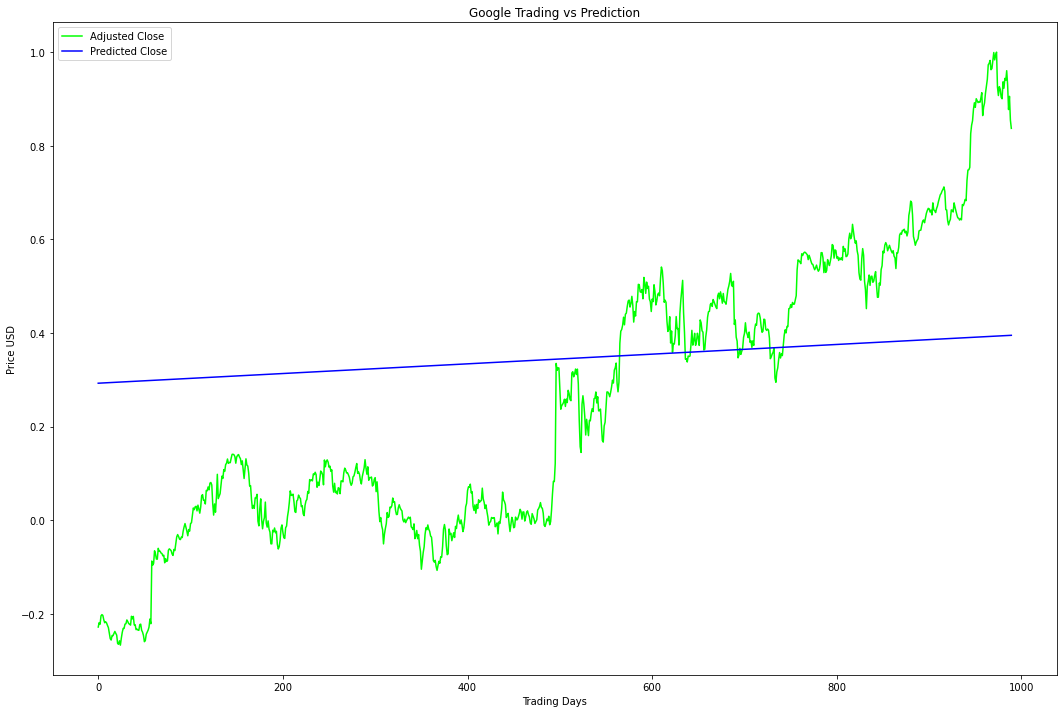

In [5]:
vs.plot_lstm_prediction(y_test,predictions)

In [6]:
trainScore = mean_squared_error(X_train, y_train)

In [7]:
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)


In [10]:
testScore = mean_squared_error(predictions, y_test)
print('Train Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(trainScore)))

Train Score: 0.08133781 MSE (0.43031702 RMSE)


# Long-Sort Term Memory Model

In [29]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())


,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


In [31]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [32]:
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train.values, unroll_length)
X_test = sd.unroll(X_test.values, unroll_length)
y_train = y_train.values[-X_train.shape[0]:]
y_test = y_test.values[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


AttributeError: 'DataFrame' object has no attribute 'as_matrix'